# Week 3 handin

# Exercise for the 3rd course week

## Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ,gender, ects, classroom, grade, img_url
7. Read student data into a list of Students from a csv file (Each student can appear on multiple lines): 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis
8. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
9. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

## Ex 2 Exceptions (extra)
1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
   1. If an exception is raised write an appropriate message to the file

## Ex 3 Plotting (extra)
1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)

## 02 Status
I finished all of given tasks

## 03 Solution part 1

In [46]:
# 1.0
%matplotlib notebook
%matplotlib inline
from modules.week3.student_utils import read_students, create_students
import matplotlib.pyplot as plot

In [47]:
# Create students
students = create_students(10)
print(students)

[name: Carl-Emil, img_url: https://student-image.com/carl-emil, average grade: 8.25 progression: 80.0
, name: Bob, img_url: https://student-image.com/bob, average grade: 9.75 progression: 80.0
, name: Tobias, img_url: https://student-image.com/tobias, average grade: 11.0 progression: 40.0
, name: Amalie, img_url: https://student-image.com/amalie, average grade: 7.0 progression: 20.0
, name: Jens, img_url: https://student-image.com/jens, average grade: 9.666666666666666 progression: 60.0
, name: Alice, img_url: https://student-image.com/alice, average grade: 8.25 progression: 80.0
, name: Someone, img_url: https://student-image.com/someone, average grade: 8.0 progression: 60.0
, name: Hans, img_url: https://student-image.com/hans, average grade: 8.6 progression: 100.0
, name: Jon, img_url: https://student-image.com/jon, average grade: 8.6 progression: 100.0
, name: Johan, img_url: https://student-image.com/johan, average grade: 8.6 progression: 100.0
]


['stud_name', ' course_name', ' teacher_name', ' gender', ' ects', ' classroom', ' grade', ' img_url']
name: Carl-Emil, img_url:  https://student-image.com/carl-emil, average grade: 7.5 progression: 0.0

name: Bob, img_url:  https://student-image.com/bob, average grade: 5.25 progression: 0.0

name: Tobias, img_url:  https://student-image.com/tobias, average grade: 4.5 progression: 0.0

name: Amalie, img_url:  https://student-image.com/amalie, average grade: 10.0 progression: 0.0

name: Jens, img_url:  https://student-image.com/jens, average grade: 3.6666666666666665 progression: 0.0

name: Alice, img_url:  https://student-image.com/alice, average grade: 5.25 progression: 0.0

name: Someone, img_url:  https://student-image.com/someone, average grade: 4.0 progression: 0.0

name: Hans, img_url:  https://student-image.com/hans, average grade: 6.8 progression: 0.0

name: Jon, img_url:  https://student-image.com/jon, average grade: 7.2 progression: 0.0



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

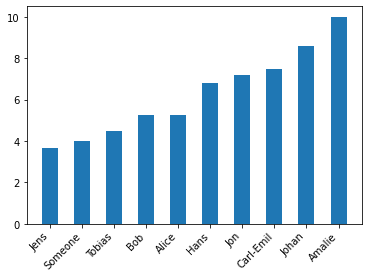

In [48]:
# read students from csv file
all_students = read_students()

# Create bar out of the students
plot.bar(
    [s.name for s in all_students],
    height=[s.get_avg_grade() for s in all_students],
    width=0.5,
    align="center"
)
plot.xticks(rotation=45, horizontalalignment="right", fontweight="light")

80.0
80.0
40.0
20.0
60.0
80.0
60.0
100.0
100.0
100.0


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text major ticklabel objects>)

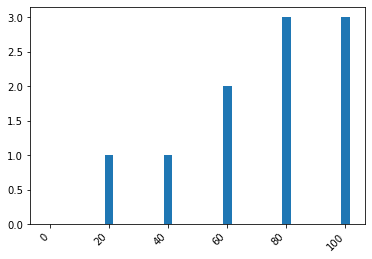

In [49]:
# Show progress of the study
def get_progress_dict():
    steps = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    progress = dict((key, 0) for key in steps)   
    for student in students:
        p = student.get_progression()
        print(p)
        progress[p] += 1
    return progress
    
progress = get_progress_dict()

plot.bar(
    progress.keys(),
    height=progress.values(),
    width=3.0,
    align="center"
)
plot.xticks(rotation=45, horizontalalignment="right")


## 03 Solution part 2

In [50]:
from modules.week3.exceptions import get_students_closet_to_finish, create_csv_for_three_students
from modules.week2.file_management import read_csv

In [51]:
# 2.1
# Function that can take a list of students and return the three closest to compleating
print(get_students_closet_to_finish(students))

[name: Hans, img_url: https://student-image.com/hans, average grade: 8.6 progression: 100.0
, name: Jon, img_url: https://student-image.com/jon, average grade: 8.6 progression: 100.0
, name: Johan, img_url: https://student-image.com/johan, average grade: 8.6 progression: 100.0
]


In [52]:
# Function that can create csv with 3 closest
create_csv_for_three_students(students)
print(read_csv("files/closest_students.csv"))

['stud_name, course_name, teacher_name, gender, ects, classroom, grade, img_url\n', 'Hans, Math, Patrik, MALE, ?, 10, 4, https://student-image.com/hans\n', 'Hans, Danish, Jens, MALE, ?, 102, 12, https://student-image.com/hans\n', 'Hans, English, Coleen, MALE, ?, 201, 7, https://student-image.com/hans\n', 'Hans, History, Jon, MALE, ?, 7, 10, https://student-image.com/hans\n', 'Hans, CS, Thomas, MALE, ?, 105, 10, https://student-image.com/hans\n', 'Jon, Danish, Jens, MALE, ?, 102, 12, https://student-image.com/jon\n', 'Jon, CS, Thomas, MALE, ?, 105, 10, https://student-image.com/jon\n', 'Jon, Math, Patrik, MALE, ?, 10, 4, https://student-image.com/jon\n', 'Jon, English, Coleen, MALE, ?, 201, 7, https://student-image.com/jon\n', 'Jon, History, Jon, MALE, ?, 7, 10, https://student-image.com/jon\n', 'Johan, Danish, Jens, MALE, ?, 102, 12, https://student-image.com/johan\n', 'Johan, CS, Thomas, MALE, ?, 105, 10, https://student-image.com/johan\n', 'Johan, English, Coleen, MALE, ?, 201, 7, ht

## 03 Solutions part 3
## Plotting

In [53]:
from modules.week3.student import Student, Gender
from modules.week3.course import Course
from typing import List, Dict

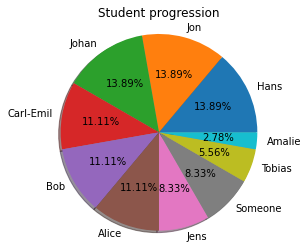

In [54]:
# 3.0
def create_pie_chart_from_students(students: List[Student]):
    _, ax1 = plot.subplots()
    values = dict((s.name, s.get_progression()) for s in students)
    ax1.pie(list(values.values()), labels=list(values.keys()), shadow=True,
        autopct=lambda s: f"{round(s, 2)}%"
    )
    plot.autoscale(True)
    plot.title("Student progression")
    plot.show()

create_pie_chart_from_students(students)


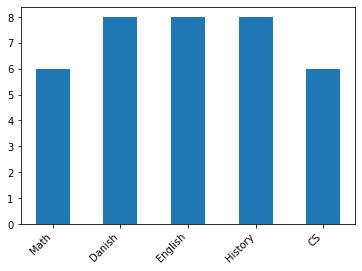

In [55]:
# 3.1 Function can take a list of students and show amount of students on each course

def get_student_dict(students: List[Student]) -> Dict[str, List[Course]]:
    courses = dict()
    for student in students:
        for course in student.get_courses():
            courses.setdefault(course.name, list())
            courses[course.name].append(course)
    return courses

def how_many_students(students: List[Student]):
    courses = get_student_dict(students)
    plot.bar(
        list(courses.keys()),
        height=[len(course_list) for course_list in courses.values()],
        width=0.5,
        align="center"
    )
    plot.xticks(rotation=45, horizontalalignment="right", fontweight="light")
    

how_many_students(students)

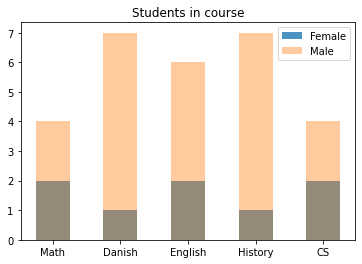

In [56]:
# Make the figure show males and females in different colors

def get_student_dict_in_colors(students: List[Student]):
    courses: Dict[str, Dict[Gender, List[Course]]] = dict()
    for student in students:
        for course in student.get_courses():
            courses.setdefault(course.name, {Gender.FEMALE: list(), Gender.MALE: list()})
            courses[course.name][student.gender].append(course)
    return courses

def get_plot(keys, values, alpha):
    p = plot.bar(
        keys,
        height=values,
        width=0.5,
        align="center",
        alpha=alpha
    )
    plot.title("Students in course")
    plot.tick_params(axis="both", which="major", labelsize=10)
    return p

def get_y_values(courses, gender):
    return [len(course_list[gender]) for course_list in courses.values()]

def how_many_students_in_colors(students: List[Student]):
    courses = get_student_dict_in_colors(students)
    keys = list(courses.keys())
    females = get_plot(keys, get_y_values(courses, Gender.FEMALE), 0.8)
    males = get_plot(keys, get_y_values(courses, Gender.MALE), 0.4)
    plot.legend([females, males], ["Female", "Male"], loc=1)

how_many_students_in_colors(students)